# Differential Operator

Plan:
- Graph Functions
- Graph Differential Analysis
- Graph Empiriral Data
- Graph Non Differentiable Functions

Case Studies:

- Yeast Growth
- Phillips Curve
- Metabolic Rate
- Empirical Data
- Radioactive Decay
- Newton's Law of Cooling
- Individual Skill Acquisition
- Rate of Technological Progress
- Simple Model of Inventory Depletion
- Sensitivity of Bond Price to Interest Rates

## Differentiablity

The **Weierstrass function** is a famous example of a function that is continuous everywhere but differentiable nowhere. It’s often defined as:


$W(x) = \sum_{n=0}^{\infty} a^n \cos(b^n \pi x)$


where:
- $0 < a < 1$
- $b$ is a positive odd integer
- $ab > 1 + \frac{3\pi}{2}$ (to ensure nowhere differentiability)


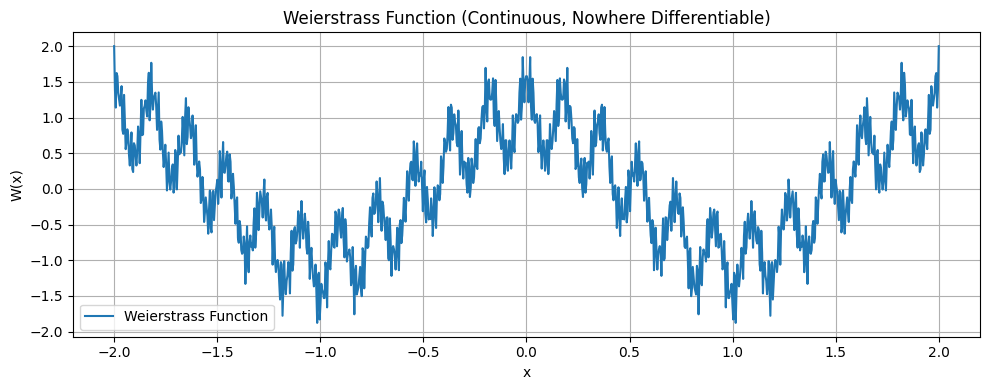

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def weierstrass(x, a=0.5, b=11, n_terms=100):
    """Compute the Weierstrass function W(x)"""
    assert 0 < a < 1, "a must be in (0, 1)"
    assert b % 2 == 1 and b > 0, "b must be a positive odd integer"
    W = np.zeros_like(x, dtype=float)
    for n in range(n_terms):
        W += a**n * np.cos(b**n * np.pi * x)
    return W

# Define the input domain
x = np.linspace(-2, 2, 1000)
y = weierstrass(x)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(x, y, label="Weierstrass Function")
plt.title("Weierstrass Function (Continuous, Nowhere Differentiable)")
plt.xlabel("x")
plt.ylabel("W(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Deriviative Operator

### 📈 Logistic Growth Model

The **general form** is:

$N(t) = \frac{K}{1 + \left(\frac{K - N_0}{N_0}\right)e^{-rt}}$

Where:  
- $N(t)$ = population at time $t$  
- $N_0$ = initial population  
- $K$ = carrying capacity  
- $r$ = growth rate  
- $t$ = time

The **derivative form**:


The **derivative** with respect to time $t$ is:

$\frac{dN}{dt} = rN(t)\left(1 - \frac{N(t)}{K}\right)$




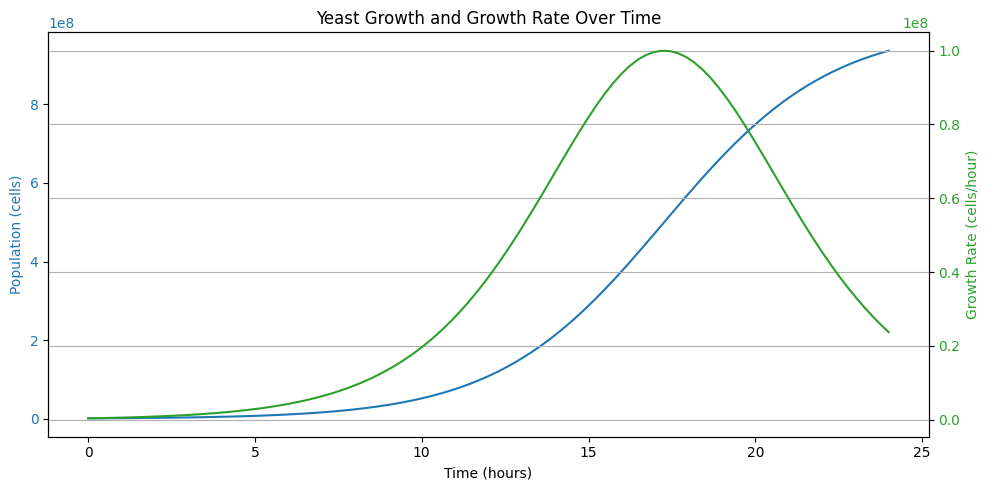

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def yeast_growth(t, N0, K, r):
    """Logistic growth model for yeast population."""
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

def yeast_growth_derivative(t, N0, K, r):
    """Derivative of yeast population over time."""
    N = yeast_growth(t, N0, K, r)
    return r * N * (1 - N / K)

# Parameters
N0 = 1e6       # initial yeast count (e.g., cells)
K = 1e9        # carrying capacity
r = 0.4        # growth rate (per hour)

# Time points
t = np.linspace(0, 24, 100)  # simulate 24 hours

# Compute growth
N = yeast_growth(t, N0, K, r)
dNdt = yeast_growth_derivative(t, N0, K, r)

# Plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Primary y-axis: population
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Population (cells)', color='tab:blue')
ax1.plot(t, N, label='Population', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Secondary y-axis: growth rate
ax2 = ax1.twinx()
ax2.set_ylabel('Growth Rate (cells/hour)', color='tab:green')
ax2.plot(t, dNdt, label='Growth Rate (dN/dt)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('Yeast Growth and Growth Rate Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

### 

### 📉 **Simple Phillips Curve Function**

The **Phillips Curve** shows the inverse relationship between **inflation** and **unemployment**, at least in its original (short-run) form.

A simple mathematical version of the **Phillips Curve** can be written as: 

$\pi(u) = \pi^e - \beta (u - u^*)$

Where:
- $\pi$ = actual inflation rate  
- $\pi^e$ = expected inflation rate  
- $\beta > 0$ = sensitivity of inflation to unemployment  
- $u$ = actual unemployment rate  
- $u^*$ = natural rate of unemployment (a.k.a. NAIRU)

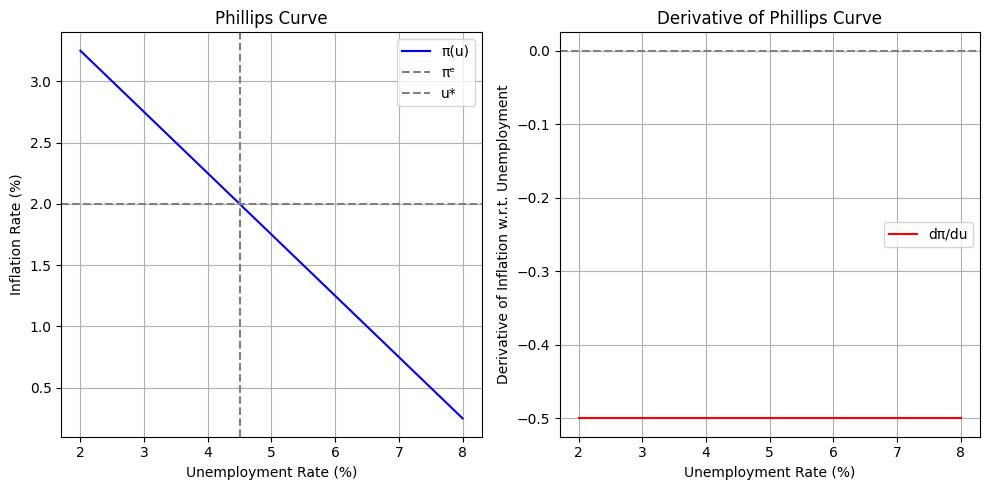

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
pi_e = 2.0      # Expected inflation (%)
u_star = 4.5    # Natural unemployment rate (%)
beta = 0.5      # Slope coefficient

# Phillips Curve function
def phillips_curve(u):
    return pi_e - beta * (u - u_star)

# Derivative: dπ/du = -β (constant)
def phillips_derivative(u):
    return -beta * np.ones_like(u)

# Range of unemployment values
u_vals = np.linspace(2, 8, 100)
pi_vals = phillips_curve(u_vals)
dpi_vals = phillips_derivative(u_vals)

# Plotting
plt.figure(figsize=(10, 5))

# Plot the Phillips Curve
plt.subplot(1, 2, 1)
plt.plot(u_vals, pi_vals, label="π(u)", color='blue')
plt.axhline(pi_e, linestyle='--', color='gray', label='πᵉ')
plt.axvline(u_star, linestyle='--', color='gray', label='u*')
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.title("Phillips Curve")
plt.grid(True)
plt.legend()

# Plot the derivative
plt.subplot(1, 2, 2)
plt.plot(u_vals, dpi_vals, label="dπ/du", color='red')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Derivative of Inflation w.r.t. Unemployment")
plt.title("Derivative of Phillips Curve")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Radioactive Day

> Aka.  Decay Law (Exponential Decay).

> Radioactive decay describes the process by which an unstable atomic nucleus loses energy by emitting radiation. The decay of a radioactive substance follows a probabilistic model, often described by the following formulations:

The number of atoms $N(t)$ of a radioactive substance at time  $t$ is given by the exponential decay law:

$N(t) = N_0 e^{-\lambda t}$


Where:
- $N_0$ is the initial number of atoms at time $t = 0 $,
- $N(t)$ is the number of atoms remaining at time $t $,
- $\lambda$ is the decay constant (the probability per unit time that an atom will decay),
- $t$ is time.


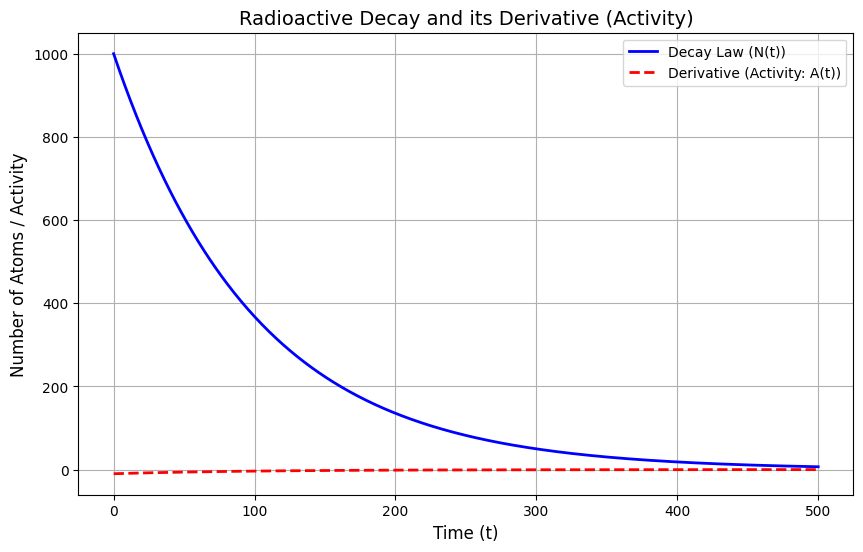

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N0 = 1000  # initial number of atoms
lambda_ = 0.01  # decay constant
time = np.linspace(0, 500, 500)  # time range

# Exponential decay function
N_t = N0 * np.exp(-lambda_ * time)

# Derivative of the decay function (rate of decay / activity)
dN_t = -lambda_ * N_t

# Plotting the decay function and its derivative
plt.figure(figsize=(10, 6))
plt.plot(time, N_t, label='Decay Law (N(t))', color='b', linewidth=2)
plt.plot(time, dN_t, label="Derivative (Activity: A(t))", color='r', linestyle='--', linewidth=2)
plt.title("Radioactive Decay and its Derivative (Activity)", fontsize=14)
plt.xlabel("Time (t)", fontsize=12)
plt.ylabel("Number of Atoms / Activity", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Individual Skill Acquisition

> Cognitive Learning Model.

In cognitive learning, skill acquisition involves changes in mental processes that contribute to task execution. One formulation is:

$S(t) = \frac{S_0}{1 + \alpha t}$


Where:
- $S(t)$ is the skill level at time $t$,
- $S_0$ is the initial skill level,
- $\alpha$ is a constant that determines the rate of skill improvement,
- $t$ is the amount of practice or time.


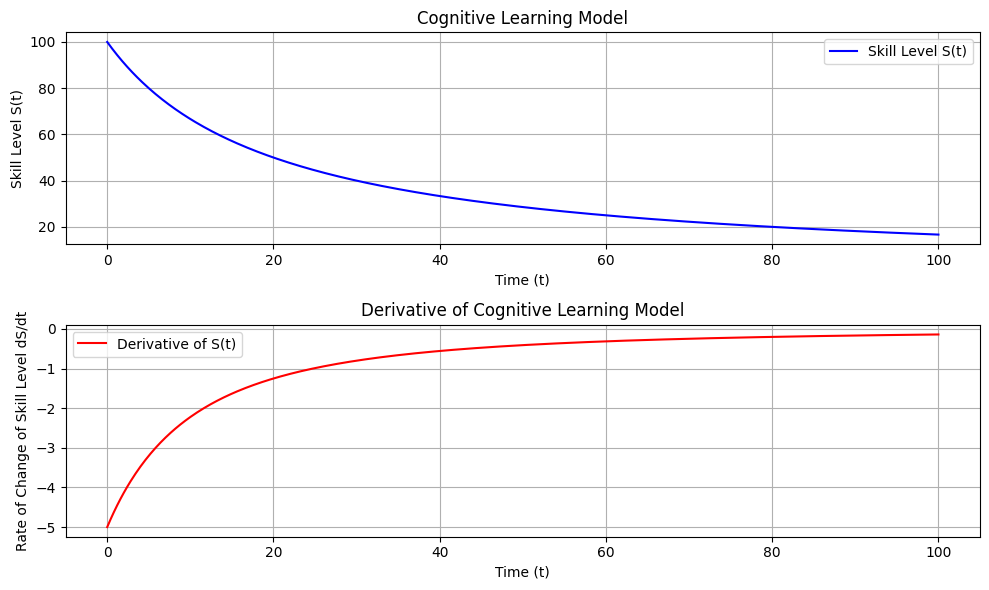

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cognitive learning model function
def cognitive_learning(t, S0, alpha):
    return S0 / (1 + alpha * t)

# Derivative of the cognitive learning model
def derivative_cognitive_learning(t, S0, alpha):
    return -S0 * alpha / (1 + alpha * t)**2

# Parameters
S0 = 100  # Initial skill level
alpha = 0.05  # Rate of improvement
t_values = np.linspace(0, 100, 500)  # Time values

# Compute skill level and its derivative
S_values = cognitive_learning(t_values, S0, alpha)
S_prime_values = derivative_cognitive_learning(t_values, S0, alpha)

# Plotting the cognitive learning model and its derivative
plt.figure(figsize=(10, 6))

# Plot the cognitive learning model
plt.subplot(2, 1, 1)
plt.plot(t_values, S_values, label="Skill Level S(t)", color='b')
plt.title("Cognitive Learning Model")
plt.xlabel("Time (t)")
plt.ylabel("Skill Level S(t)")
plt.grid(True)
plt.legend()

# Plot the derivative of the cognitive learning model
plt.subplot(2, 1, 2)
plt.plot(t_values, S_prime_values, label="Derivative of S(t)", color='r')
plt.title("Derivative of Cognitive Learning Model")
plt.xlabel("Time (t)")
plt.ylabel("Rate of Change of Skill Level dS/dt")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Rate of Technological Progress

> A more realistic model might be **logistic growth**, where the progress starts off exponentially but slows down as it approaches a maximum capacity or technological limit (e.g., physical, societal, or economic constraints).

$P(t) = \frac{L}{1 + e^{-k(t - t_0)}}$

Where:
- $P(t)$ = level of technological progress at time $t$
- $L$ = maximum level of progress (carrying capacity)
- $k$ = growth rate
- $t_0$ = time of the inflection point

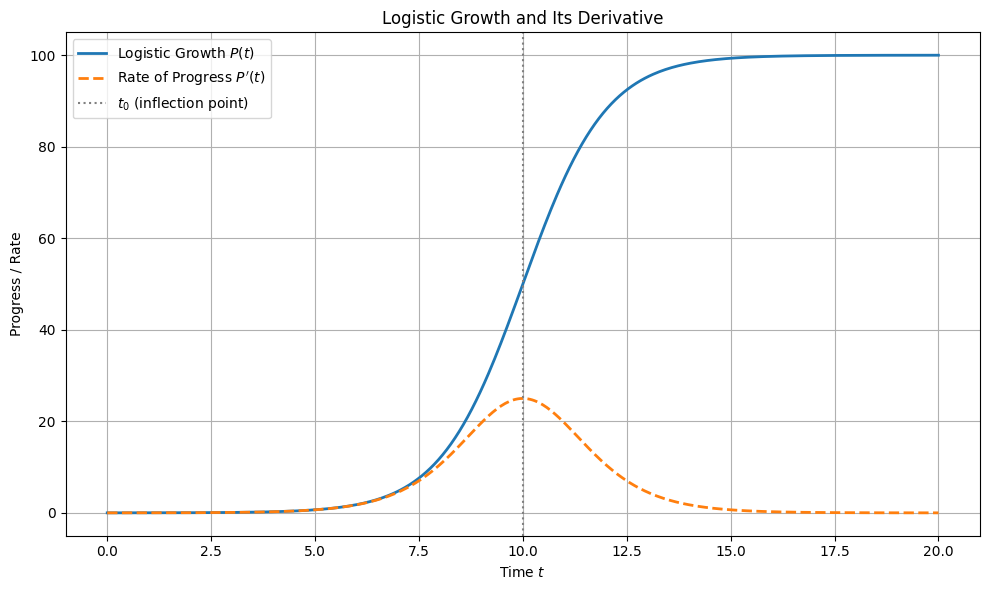

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 100
k = 1
t0 = 10

# Time range
t = np.linspace(0, 20, 400)

# Logistic function
P = L / (1 + np.exp(-k * (t - t0)))

# Derivative of logistic function
P_prime = (L * k * np.exp(-k * (t - t0))) / ((1 + np.exp(-k * (t - t0)))**2)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, P, label='Logistic Growth $P(t)$', linewidth=2)
plt.plot(t, P_prime, label="Rate of Progress $P'(t)$", linestyle='--', linewidth=2)
plt.axvline(t0, color='gray', linestyle=':', label='$t_0$ (inflection point)')
plt.title('Logistic Growth and Its Derivative')
plt.xlabel('Time $t$')
plt.ylabel('Progress / Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

###  🧮 Basic Linear Depletion Model

> A **Simple Model of Inventory Depletion** captures how inventory decreases over time due to usage or demand.

> The simplest form assumes constant usage (or demand rate) and no replenishment.

$I(t) = I_0 - r \cdot t$


Where:
- $I(t)$: inventory level at time $t$
- $I_0$: initial inventory
- $r$: constant rate of demand or usage
- $t$: time

This is a **linear model**, assuming:
- no restocking,
- constant consumption rate,
- no lead times or delays.

## References

- [Differential Operator](https://righteous-guardian-68f.notion.site/Differential-Operator-874decad8ce3434483a7fa3d42d3b1c7?pvs=4)